## Support Vector Regressor Implementation

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

### Lets create synthetic data points

noise parameter is sispersiing the data!

In [74]:

from sklearn.datasets import make_regression
X,y=make_regression(n_samples=2500,n_features=2,n_targets=1,noise=10.0)

X,y

(array([[ 1.08198579,  0.11694078],
        [ 1.18821805,  0.60087966],
        [-0.82710012, -0.04545059],
        ...,
        [-0.60359008,  1.9397413 ],
        [-0.88141249, -1.36400005],
        [-0.55815165,  0.02061175]]),
 array([  53.35989978,  111.92149846,  -20.51568002, ...,  106.88188152,
        -136.76346574,  -38.24196422]))

In [75]:
pd.DataFrame(X)[0]

0       1.081986
1       1.188218
2      -0.827100
3      -0.921100
4      -0.298793
          ...   
2495   -1.077311
2496   -0.861193
2497   -0.603590
2498   -0.881412
2499   -0.558152
Name: 0, Length: 2500, dtype: float64

<Axes: xlabel='0', ylabel='1'>

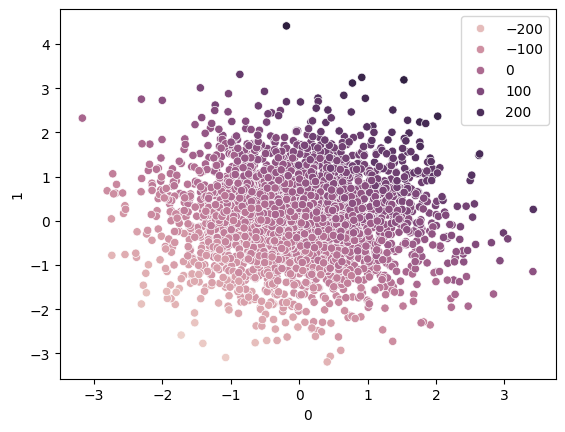

In [76]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [78]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [79]:
svr.coef_

array([[46.49249214, 60.34512681]])

#### Prediction

In [80]:

y_pred=svr.predict(X_test)

### Score

In [81]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9820365812091539


## Hyperparametere Tuning With SVR

In [82]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 50, 100, 150, 200],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [83]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [84]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.972 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.974 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.976 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.972 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.974 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamm

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 50, 100, 150, 200],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

### Best parameters found

In [85]:
grid.best_params_

{'C': 50, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

### Prediction

In [86]:

y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9820262857691943


## Visualization of SVR

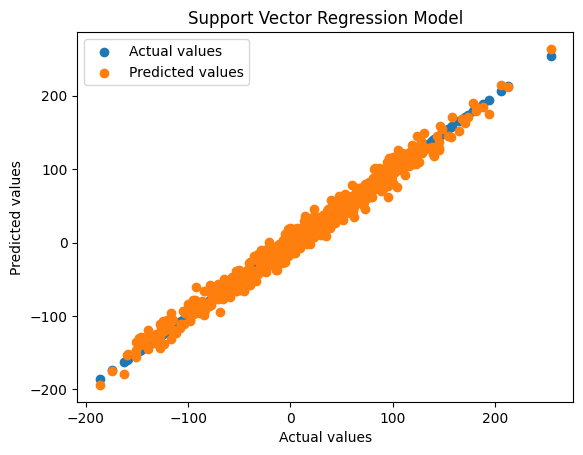

In [87]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.scatter(y_test, y_test, label='Actual values')

# Plot the predicted values
plt.scatter(y_test, y_pred, label='Predicted values')

# Add title and labels
plt.title('Support Vector Regression Model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Add legend
plt.legend()

# Show the plot
plt.show()

#### y_pred_1D is created cause once got error in dimension mistmatch .ravel() changes y_pred from 2D to 1D

In [88]:
y_pred_1D = y_pred.ravel() 

In [89]:
print( y_pred.shape, y_test.shape,y_pred_1D.shape)

(625,) (625,) (625,)


In [90]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred_1D, title='Support Vector Regression Model')
fig.update_layout(xaxis_title='Actual values', yaxis_title='Predicted values')
fig.show()

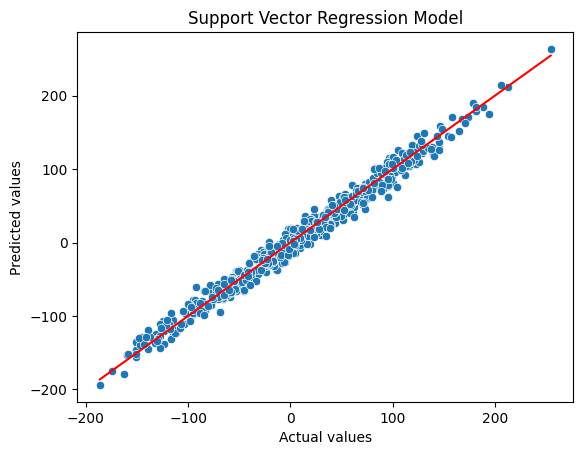

In [91]:
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred_1D)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.title('Support Vector Regression Model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [92]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np

# Assuming X_train and X_test are 2D arrays with shape (n_samples, 2)
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()

# Create a meshgrid for plotting
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Evaluate the SVR model on the meshgrid
zz = svr.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(x=xx, y=yy, z=zz, colorscale='viridis', opacity=0.7)])

# Add the optimal hyperplane (decision boundary)
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, showscale=False, surfacecolor=np.zeros_like(zz), opacity=0.5, colorscale='viridis'))

# Add the positive and negative hyperplanes
margin = 1 / np.sqrt(svr.C)
fig.add_trace(go.Surface(x=xx, y=yy, z=zz + margin, showscale=False, surfacecolor=np.ones_like(zz), opacity=0.3, colorscale='viridis'))
fig.add_trace(go.Surface(x=xx, y=yy, z=zz - margin, showscale=False, surfacecolor=-np.ones_like(zz), opacity=0.3, colorscale='viridis'))

# Add scatter plot of training data
fig.add_trace(go.Scatter3d(x=X_train[:, 0], y=X_train[:, 1], z=y_train, mode='markers', marker=dict(size=3, color='black')))

# Update layout and legend
fig.update_layout(title='Support Vector Regressor (SVR) Model', scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Target Variable'))
fig.update_layout(legend=dict(orientation='h', yanchor='bottom', xanchor='right', x=1, y=1.02))

# Show the plot
fig.show()
pio.write_html(fig, file='SVR_3D_plot.html', auto_open=True)